In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
#Read in the MADELON dataset
md_train = pd.read_csv("../datasets/madelon/madelon_train.data", sep=' ', header=None).drop(500, axis=1) #last column is NaN
md_train_labels = pd.read_csv("../datasets/madelon/madelon_train.labels", sep=' ', header=None)
md_test = pd.read_csv("../datasets/madelon/madelon_valid.data", sep = ' ', header=None).drop(500, axis=1) #Last column is NaN
md_test_labels = pd.read_csv("../datasets/madelon/madelon_valid.labels", sep=' ', header=None)
#X_train, X_test, y_train, y_test = md_train, md_test, md_train_labels[0], md_test_labels[0] #typical syntax

In [3]:
#Define a function to more easily run the classifier
def run_tree(X_train, y_train, X_test, y_test, depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = tree_clf.score(X_train, y_train)
    accuracy_test = tree_clf.score(X_test, y_test)
    print("Tree depth: ", depth)
    print("Training set accuracy: ", round(accuracy_train*100,4), "%")
    print("Testing set accuracy: ", round(accuracy_test*100,4), "%")
    return accuracy_train, accuracy_test

In [4]:
#Run the decision tree for the MADELON dataset
md_train_acc, md_test_acc = np.empty(12, dtype=float), np.empty(12, dtype=float)
for k in range(1,13):
    md_train_acc[k-1], md_test_acc[k-1] = run_tree(md_train, md_train_labels, md_test, md_test_labels, k)

Tree depth:  1
Training set accuracy:  62.25 %
Testing set accuracy:  61.1667 %
Tree depth:  2
Training set accuracy:  65.1 %
Testing set accuracy:  66.5 %
Tree depth:  3
Training set accuracy:  71.65 %
Testing set accuracy:  71.5 %
Tree depth:  4
Training set accuracy:  79.25 %
Testing set accuracy:  74.8333 %
Tree depth:  5
Training set accuracy:  85.9 %
Testing set accuracy:  79.1667 %
Tree depth:  6
Training set accuracy:  91.1 %
Testing set accuracy:  80.3333 %
Tree depth:  7
Training set accuracy:  94.7 %
Testing set accuracy:  78.6667 %
Tree depth:  8
Training set accuracy:  96.45 %
Testing set accuracy:  77.1667 %
Tree depth:  9
Training set accuracy:  98.2 %
Testing set accuracy:  76.0 %
Tree depth:  10
Training set accuracy:  99.05 %
Testing set accuracy:  75.5 %
Tree depth:  11
Training set accuracy:  99.6 %
Testing set accuracy:  75.3333 %
Tree depth:  12
Training set accuracy:  99.8 %
Testing set accuracy:  75.8333 %


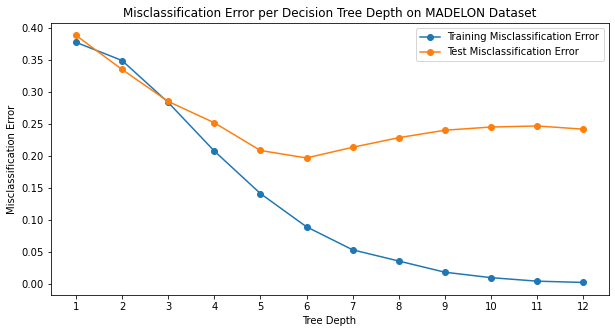

In [5]:
#Plot both train and test error on one graph
depth = np.arange(1, 13, 1)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(depth, 1 - md_train_acc, '-o', label = "Training Misclassification Error")
ax.plot(depth, 1 - md_test_acc, '-o', label = "Test Misclassification Error")
ax.set_title("Misclassification Error per Decision Tree Depth on MADELON Dataset")
ax.set_xlabel("Tree Depth")
ax.set_ylabel("Misclassification Error")
ax.set_xticks(depth)
ax.legend()
fig.savefig("MADELON Decision Tree Error.png")

In [6]:
1- max(md_test_acc)

0.19666666666666666

In [7]:
#Read in the SATIMAGE dataset
sat_X_train = pd.read_csv("../datasets/satimage/X.dat", sep = ' ', header=None)
sat_y_train = pd.read_csv("../datasets/satimage/Y.dat", sep = ' ', header=None)
sat_X_test = pd.read_csv("../datasets/satimage/Xtest.dat", sep = ' ', header=None)
sat_y_test = pd.read_csv("../datasets/satimage/Ytest.dat", sep = ' ', header=None)

In [8]:
#Run the decision tree for the SATIMAGE dataset
sat_train_acc, sat_test_acc = np.empty(12, dtype=float), np.empty(12, dtype=float)
for k in range(1,13):
    sat_train_acc[k-1], sat_test_acc[k-1] = run_tree(sat_X_train, sat_y_train, sat_X_test, sat_y_test, k)

Tree depth:  1
Training set accuracy:  44.0135 %
Testing set accuracy:  41.25 %
Tree depth:  2
Training set accuracy:  63.54 %
Testing set accuracy:  60.85 %
Tree depth:  3
Training set accuracy:  78.7824 %
Testing set accuracy:  76.25 %
Tree depth:  4
Training set accuracy:  81.7362 %
Testing set accuracy:  78.45 %
Tree depth:  5
Training set accuracy:  84.6223 %
Testing set accuracy:  80.75 %
Tree depth:  6
Training set accuracy:  87.2379 %
Testing set accuracy:  83.75 %
Tree depth:  7
Training set accuracy:  90.0564 %
Testing set accuracy:  84.5 %
Tree depth:  8
Training set accuracy:  92.221 %
Testing set accuracy:  85.5 %
Tree depth:  9
Training set accuracy:  94.0924 %
Testing set accuracy:  85.55 %
Tree depth:  10
Training set accuracy:  95.5581 %
Testing set accuracy:  86.05 %
Tree depth:  11
Training set accuracy:  97.0462 %
Testing set accuracy:  85.9 %
Tree depth:  12
Training set accuracy:  98.106 %
Testing set accuracy:  85.85 %


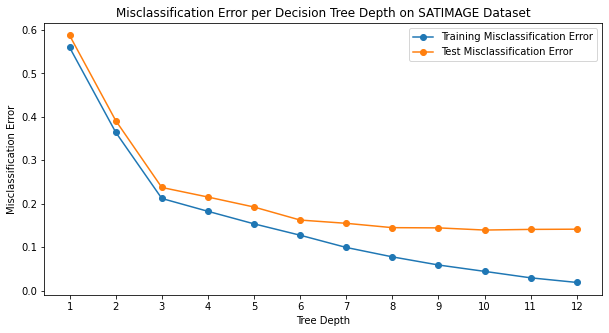

In [9]:
#Plot both train and test error on one graph
depth = np.arange(1, 13, 1)
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(depth, 1 - sat_train_acc, '-o', label = "Training Misclassification Error")
ax.plot(depth, 1 - sat_test_acc, '-o', label = "Test Misclassification Error")
ax.set_title("Misclassification Error per Decision Tree Depth on SATIMAGE Dataset")
ax.set_xlabel("Tree Depth")
ax.set_ylabel("Misclassification Error")
ax.set_xticks(depth)
ax.legend()
fig.savefig("SATIMAGE Decision Tree Error.png")

In [10]:
1-max(sat_test_acc)

0.13949999999999996

In [11]:
#Define a function to more easily run random forest
def run_random_forest(X_train, y_train, X_test, y_test, trees, feature):
    forest_clf = RandomForestClassifier(n_estimators=trees, max_features=feature).fit(X_train, y_train)
    accuracy_train = forest_clf.score(X_train, y_train)
    accuracy_test = forest_clf.score(X_test, y_test)
    print("Number of trees: ", trees)
    print("Training set accuracy: ", round(accuracy_train*100,4), "%")
    print("Testing set accuracy: ", round(accuracy_test*100,4), "%")
    return accuracy_train, accuracy_test

In [12]:
#Run the random forest for the MADELON dataset using max_features = sqrt(500)
md_train_acc1 = []
md_test_acc1 = []
trees=[3,10,30,100,300]
for i in trees:
    train, test = run_random_forest(md_train, md_train_labels[0], md_test, md_test_labels[0], i, "sqrt")
    md_train_acc1.append(train)
    md_test_acc1.append(test)
md_train_acc1 = np.array(md_train_acc1)
md_test_acc1 = np.array(md_test_acc1)

Number of trees:  3
Training set accuracy:  92.5 %
Testing set accuracy:  57.6667 %
Number of trees:  10
Training set accuracy:  99.15 %
Testing set accuracy:  61.6667 %
Number of trees:  30
Training set accuracy:  99.95 %
Testing set accuracy:  64.8333 %
Number of trees:  100
Training set accuracy:  100.0 %
Testing set accuracy:  71.0 %
Number of trees:  300
Training set accuracy:  100.0 %
Testing set accuracy:  73.8333 %


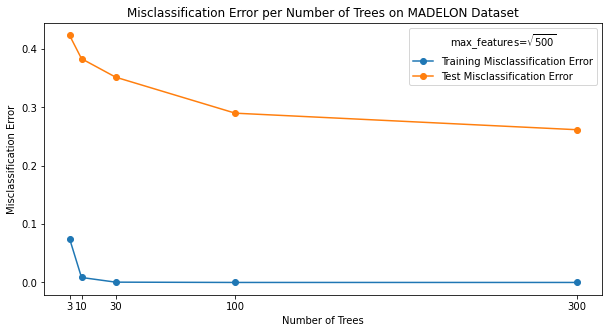

In [13]:
#Plot both train and test error on one graph
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(trees, 1 - md_train_acc1, '-o', label = "Training Misclassification Error")
ax.plot(trees, 1 - md_test_acc1, '-o', label = "Test Misclassification Error")
ax.set_title("Misclassification Error per Number of Trees on MADELON Dataset")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Misclassification Error")
ax.set_xticks(trees)
ax.legend(title="max_features=" r'$\sqrt{500}$')
fig.savefig("MADELON Random Forest Sqrt Error.png")

In [14]:
print("Training Error:", [100*(1-md_train_acc1[i]) for i in range(5)])
print("Training Error:",  [100*(1-md_test_acc1[i]) for i in range(5)])

Training Error: [7.499999999999996, 0.8499999999999952, 0.04999999999999449, 0.0, 0.0]
Training Error: [42.333333333333336, 38.33333333333333, 35.16666666666667, 29.000000000000004, 26.16666666666667]


In [15]:
#Run the random forest for the MADELON dataset using max_features = ln(500) ~ 6
md_train_acc2 = []
md_test_acc2 = []
trees=[3,10,30,100,300]
for i in trees:
    train, test = run_random_forest(md_train, md_train_labels[0], md_test, md_test_labels[0], i, 6)
    md_train_acc2.append(train)
    md_test_acc2.append(test)
md_train_acc2 = np.array(md_train_acc2)
md_test_acc2 = np.array(md_test_acc2)

Number of trees:  3
Training set accuracy:  91.8 %
Testing set accuracy:  52.3333 %
Number of trees:  10
Training set accuracy:  98.6 %
Testing set accuracy:  51.6667 %
Number of trees:  30
Training set accuracy:  100.0 %
Testing set accuracy:  59.1667 %
Number of trees:  100
Training set accuracy:  100.0 %
Testing set accuracy:  63.0 %
Number of trees:  300
Training set accuracy:  100.0 %
Testing set accuracy:  65.1667 %


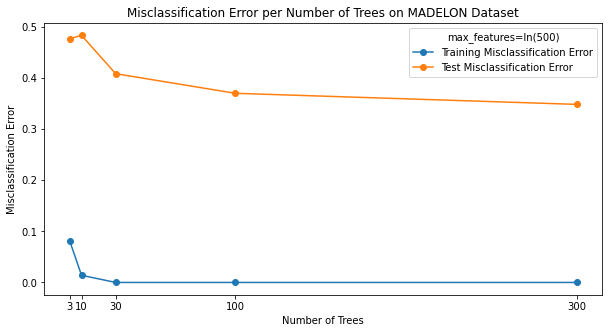

In [16]:
#Plot both train and test error on one graph
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(trees, 1 - md_train_acc2, '-o', label = "Training Misclassification Error")
ax.plot(trees, 1 - md_test_acc2, '-o', label = "Test Misclassification Error")
ax.set_title("Misclassification Error per Number of Trees on MADELON Dataset")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Misclassification Error")
ax.set_xticks(trees)
ax.legend(title="max_features=ln(500)")
fig.savefig("MADELON Random Forest Ln Error.png")

In [17]:
print("Training Error:", [100*round((1-md_train_acc2[i]),4) for i in range(5)])
print("Training Error:",  [100*round((1-md_test_acc2[i]),4) for i in range(5)])

Training Error: [8.200000000000001, 1.4000000000000001, 0.0, 0.0, 0.0]
Training Error: [47.67, 48.33, 40.83, 37.0, 34.83]


In [18]:
#Run the random forest for the MADELON dataset using max_features = None
md_train_acc3 = []
md_test_acc3 = []
trees=[3,10,30,100,300]
for i in trees:
    train, test = run_random_forest(md_train, md_train_labels[0], md_test, md_test_labels[0], i, None)
    md_train_acc3.append(train)
    md_test_acc3.append(test)
md_train_acc3 = np.array(md_train_acc3)
md_test_acc3 = np.array(md_test_acc3)

Number of trees:  3
Training set accuracy:  95.75 %
Testing set accuracy:  77.5 %
Number of trees:  10
Training set accuracy:  99.5 %
Testing set accuracy:  80.0 %
Number of trees:  30
Training set accuracy:  99.9 %
Testing set accuracy:  82.1667 %
Number of trees:  100
Training set accuracy:  100.0 %
Testing set accuracy:  84.5 %
Number of trees:  300
Training set accuracy:  100.0 %
Testing set accuracy:  85.8333 %


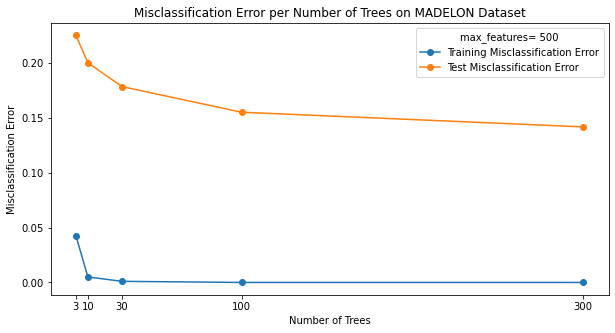

In [19]:
#Plot both train and test error on one graph
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(trees, 1 - md_train_acc3, '-o', label = "Training Misclassification Error")
ax.plot(trees, 1 - md_test_acc3, '-o', label = "Test Misclassification Error")
ax.set_title("Misclassification Error per Number of Trees on MADELON Dataset")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Misclassification Error")
ax.set_xticks(trees)
ax.legend(title="max_features= 500")
fig.savefig("MADELON Random Forest All Error.png")

In [20]:
print("Training Error:", [100*round((1-md_train_acc3[i]),4) for i in range(5)])
print("Training Error:",  [100*round((1-md_test_acc3[i]),4) for i in range(5)])

Training Error: [4.25, 0.5, 0.1, 0.0, 0.0]
Training Error: [22.5, 20.0, 17.83, 15.5, 14.17]


In [21]:
#Run the random forest for the SATIMAGE dataset using max_features = all features (None)
sat_train_acc1 = []
sat_test_acc1 = []
trees=[3,10,30,100,300]
for i in trees:
    train, test = run_random_forest(sat_X_train, sat_y_train[0], sat_X_test, sat_y_test[0], i, None)
    sat_train_acc1.append(train)
    sat_test_acc1.append(test)
sat_train_acc1 = np.array(sat_train_acc1)
sat_test_acc1 = np.array(sat_test_acc1)

Number of trees:  3
Training set accuracy:  97.5197 %
Testing set accuracy:  84.7 %
Number of trees:  10
Training set accuracy:  99.3912 %
Testing set accuracy:  88.5 %
Number of trees:  30
Training set accuracy:  99.8873 %
Testing set accuracy:  89.9 %
Number of trees:  100
Training set accuracy:  99.9775 %
Testing set accuracy:  90.1 %
Number of trees:  300
Training set accuracy:  100.0 %
Testing set accuracy:  90.1 %


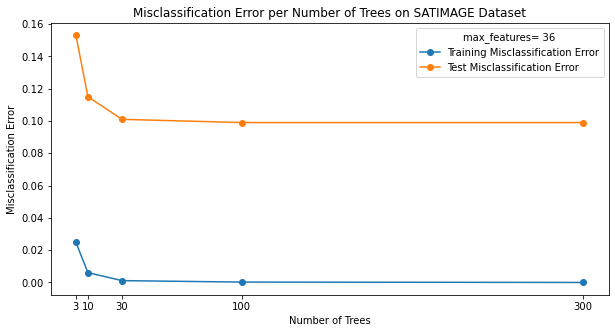

In [22]:
#Plot both train and test error on one graph
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(trees, 1 - sat_train_acc1, '-o', label = "Training Misclassification Error")
ax.plot(trees, 1 - sat_test_acc1, '-o', label = "Test Misclassification Error")
ax.set_title("Misclassification Error per Number of Trees on SATIMAGE Dataset")
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Misclassification Error")
ax.set_xticks(trees)
ax.legend(title="max_features= 36")
fig.savefig("SATIMAGE Random Forest All Error.png")

In [23]:
print("Training Error:", [100*(1-sat_train_acc1[i]) for i in range(5)])
print("Training Error:",  [100*(1-sat_test_acc1[i]) for i in range(5)])

Training Error: [2.48027057497181, 0.608793686583986, 0.11273957158962622, 0.022547914317927464, 0.0]
Training Error: [15.300000000000002, 11.5, 10.099999999999998, 9.899999999999999, 9.899999999999999]
